# Machine Failure Prediction | ITI | Data Science
Predict machine failure probability using Machine Learning and key features to enhance maintenance efficiency and reduce downtime.

## Dataset Description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Machine Failure Predictions. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences and to see whether incorporating the original in training improves model performance.

## Files

1. train.csv - the training dataset; Machine failure is the (binary) target (which, in order to align with the ordering of the original dataset, is not in the last column position)
2. test.csv - the test dataset; your objective is to predict the probability of Machine failure
3. sample_submission.csv - a sample submission file in the correct format

In [1]:
import pandas as pd

In [2]:
# Load the data
df = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')

df.head(5)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
test.head(5)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,
0,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0
1,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0
2,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0
3,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0
4,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 14.6+ MB


In [5]:
df.shape

(136429, 13)

The dataset has 136429 rows and 14 columns and 1 target column.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0
OSF,136429.0,0.003958,0.062789,0.0,0.0,0.0,0.0,1.0


In [7]:
df.isnull().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
test.isnull().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
df['Machine failure'].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

In [10]:
df['Machine failure'].value_counts(normalize=True)

Machine failure
0    0.984256
1    0.015744
Name: proportion, dtype: float64

The data does not have any missing values.
The target column is binary and the data is imbalanced. 

The imbalance is as a result of the failures being more than the non-failures.
There are over 98% of the data that are failures and 1.5% that are non-failures.

In [11]:
df['Type'].value_counts()

Type
L    95354
M    32152
H     8923
Name: count, dtype: int64

There are only two features that are of the object data type. The features are `Product ID` and `Type`. The Product ID is a unique identifier for the product and the Type is the type of the product. We will encode the `Type` feature using the `LabelEncoder` and the `Product ID` feature will be dropped as it is a unique identifier for the product and will not be useful in the model. Before encoding the `Type` feature, we'll have to change the data type of the `Type` feature to category.

We're using the `LabelEncoder` because the `Type` feature is ordinal and not nominal.

In [12]:
df.nunique()

Product ID                 9976
Type                          3
Air temperature [K]          95
Process temperature [K]      81
Rotational speed [rpm]      952
Torque [Nm]                 611
Tool wear [min]             246
Machine failure               2
TWF                           2
HDF                           2
PWF                           2
OSF                           2
RNF                           2
dtype: int64

In [13]:
# Changing datatypes
df['Type'] = df['Type'].astype('category')
df['Machine failure'] = df['Machine failure'].astype('category')
df['TWF'] = df['TWF'].astype('category')
df['HDF'] = df['HDF'].astype('category')
df['PWF'] = df['PWF'].astype('category')
df['OSF'] = df['OSF'].astype('category')
df['RNF'] = df['RNF'].astype('category')

test['Type'] = test['Type'].astype('category')
test['TWF'] = test['TWF'].astype('category')
test['HDF'] = test['HDF'].astype('category')
test['PWF'] = test['PWF'].astype('category')
test['OSF'] = test['OSF'].astype('category')
test['RNF'] = test['RNF'].astype('category')

In [14]:
# Removing the Product ID feature
df.drop('Product ID', axis=1, inplace=True)
test.drop('Product ID', axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136429 entries, 0 to 136428
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Type                     136429 non-null  category
 1   Air temperature [K]      136429 non-null  float64 
 2   Process temperature [K]  136429 non-null  float64 
 3   Rotational speed [rpm]   136429 non-null  int64   
 4   Torque [Nm]              136429 non-null  float64 
 5   Tool wear [min]          136429 non-null  int64   
 6   Machine failure          136429 non-null  category
 7   TWF                      136429 non-null  category
 8   HDF                      136429 non-null  category
 9   PWF                      136429 non-null  category
 10  OSF                      136429 non-null  category
 11  RNF                      136429 non-null  category
dtypes: category(7), float64(3), int64(2)
memory usage: 7.2 MB


The `Product ID` feature has been removed from the dataset and the `Type` feature has been converted to the category data type.
We can now encode the `Type` feature using the `OrdinalEncoder`.

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
ordinal_encoder = OrdinalEncoder()

# Encode all the categorical types in the data frame
for col in df.columns:
    if df[col].dtype.name == 'category':
        df[col] = ordinal_encoder.fit_transform(df[col].values.reshape(-1, 1))

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,
0,1.0,300.6,309.6,1596,36.1,140,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,302.6,312.1,1759,29.1,200,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,299.3,308.5,1805,26.5,25,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,301.0,310.9,1524,44.3,197,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,298.0,309.0,1641,35.4,34,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Encode all the categorical types in the test data frame
for col in test.columns:
    if test[col].dtype.name == 'category':
        test[col] = ordinal_encoder.fit_transform(test[col].values.reshape(-1, 1))

test.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,
0,2.0,298.1,308.6,1551,42.8,0,0.0,0.0,0.0,0.0,0.0
1,1.0,298.2,308.7,1408,46.3,3,0.0,0.0,0.0,0.0,0.0
2,1.0,298.1,308.5,1498,49.4,5,0.0,0.0,0.0,0.0,0.0
3,1.0,298.2,308.6,1433,39.5,7,0.0,0.0,0.0,0.0,0.0
4,1.0,298.2,308.7,1408,40.0,9,0.0,0.0,0.0,0.0,0.0


The ordinal encoder has encoded the `Type` feature as follows:
- 0: H
- 1: L
- 2: M

In [19]:
# df.drop('id', axis=1, inplace=True)
# test.drop('id', axis=1, inplace=True)

## Exploratory Data Analysis

In [20]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

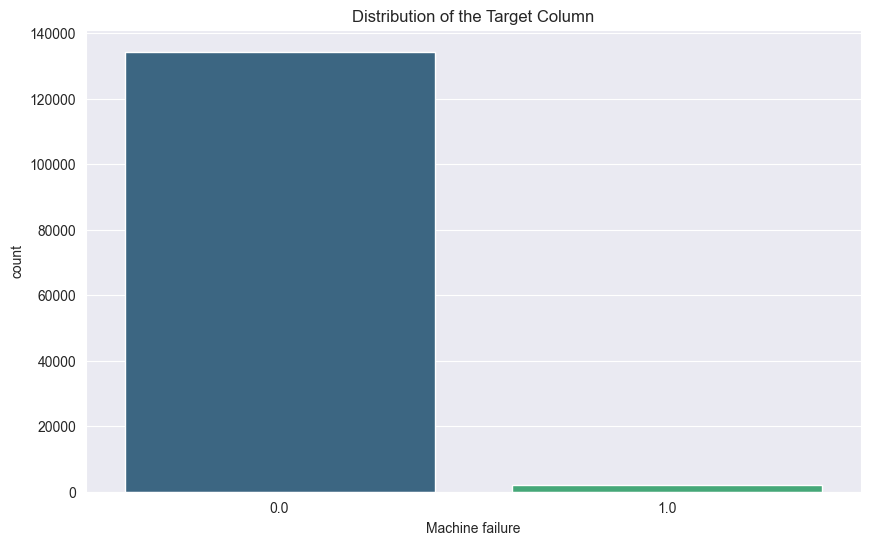

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Machine failure'], palette='viridis', hue=df['Machine failure'], legend=False)
plt.title('Distribution of the Target Column')

plt.show()

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Air temperature [K]'}>],
       [<Axes: title={'center': 'Process temperature [K]'}>,
        <Axes: title={'center': 'Rotational speed [rpm]'}>],
       [<Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>]], dtype=object)

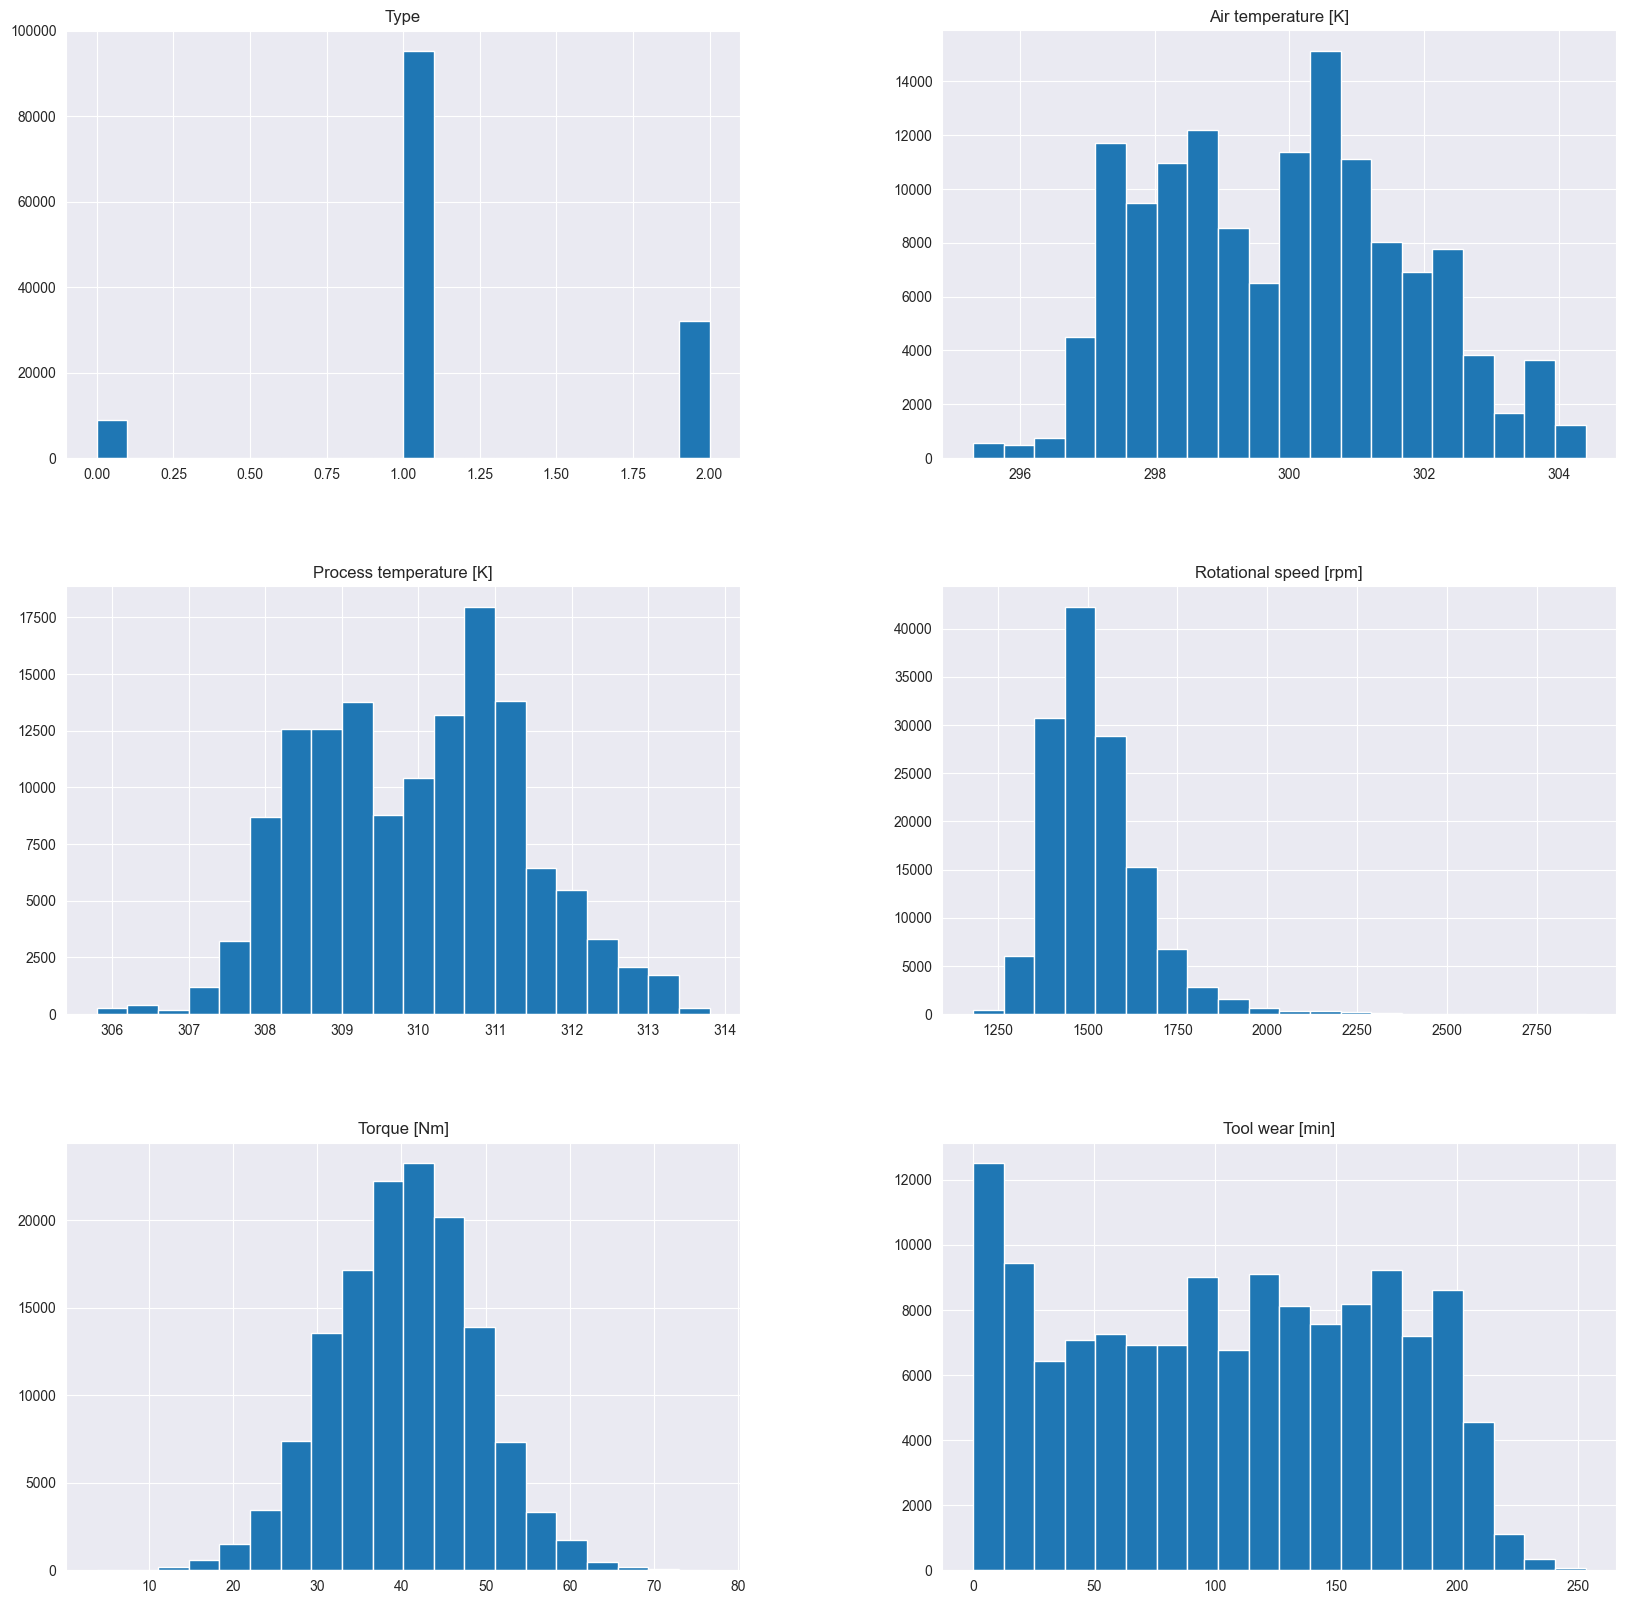

In [22]:
# Checking the distribution of the features
df.hist(bins=20, figsize=(20, 20), column=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])

In [23]:
# barchart of percentages of type, machine failure, twf, hdf, pwf, osf, and rnf

# df_percentages = df.apply(lambda x: (x / x.sum()) * 100, axis=0)
# df_percentages = df_percentages[['Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
# 
# plt.figure(figsize=(15, 10))
# df_percentages.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
# plt.title('Percentage Distribution of Type, Machine failure, TWF, HDF, PWF, OSF, and RNF')
# plt.show()

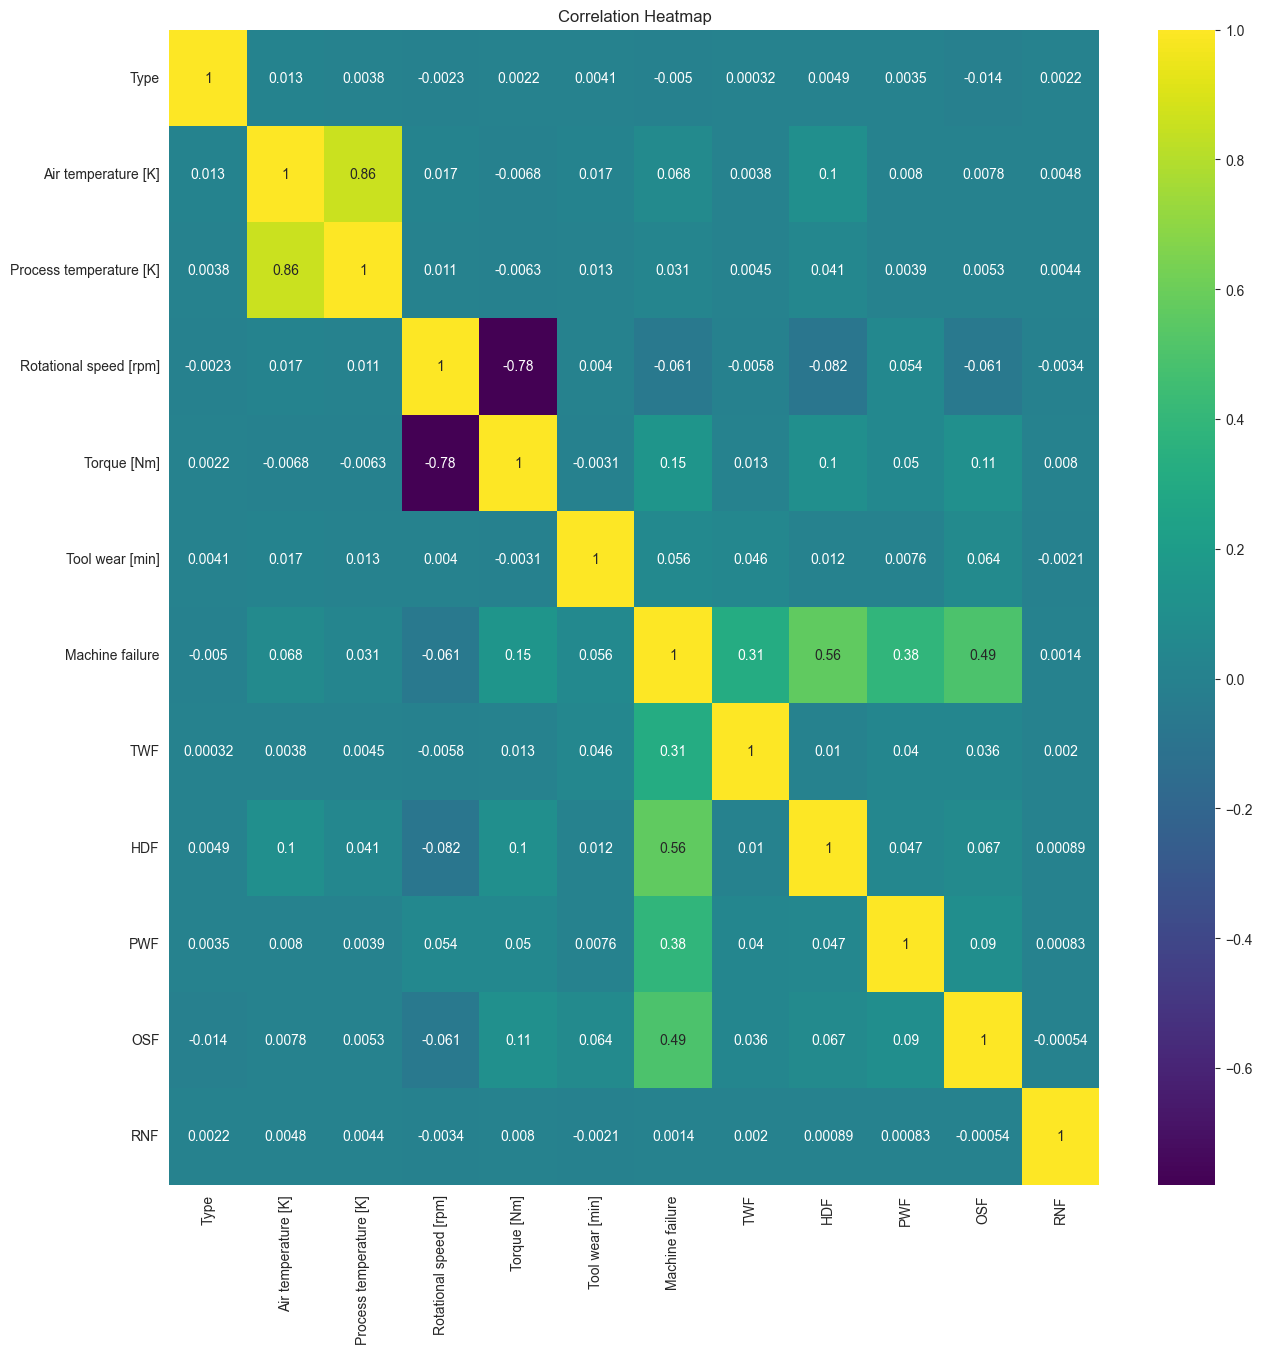

In [24]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
df.corr()['Machine failure'].sort_values(ascending=False)

Machine failure            1.000000
HDF                        0.564507
OSF                        0.494668
PWF                        0.383941
TWF                        0.311919
Torque [Nm]                0.145793
Air temperature [K]        0.067744
Tool wear [min]            0.056448
Process temperature [K]    0.030966
RNF                        0.001428
Type                      -0.005049
Rotational speed [rpm]    -0.060868
Name: Machine failure, dtype: float64

Looking at how imbalanced the data is, we'll have to handle the imbalance in the data. Below are some of the techniques that can be used to handle the imbalance in the data
1. Over-sampling the minority class
2. Under-sampling the majority class
3. Cost-sensitive learning
4. Ensemble methods

We'll use the `ADASYN` technique to handle the imbalance in the data. The `ADASYN` technique generates synthetic samples for the minority class. The `ADASYN` technique is available in the `imbalanced-learn` library.

In [26]:
# Splitting the data into features and target
from sklearn.preprocessing import StandardScaler

X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

columns = X.columns

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
from imblearn.over_sampling import ADASYN

# Instantiating the ADASYN class
adasyn = ADASYN(random_state=42, n_neighbors=11)

# Fitting the ADASYN class to the data
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Converting the resampled data to a DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=columns)
y_resampled = pd.Series(y_resampled, name='Machine failure')

# Checking the resampled data
y_resampled.value_counts(normalize=True)

Machine failure
0.0    0.500093
1.0    0.499907
Name: proportion, dtype: float64

In [ ]:
# plot the y_resampled by grouping it onto 0s and 1s
plt.figure(figsize=(10, 6))
sns.countplot(y_resampled)
plt.title('Distribution of the Target Column after Resampling')
plt.show()

We can see that the data is now balanced after using the `ADASYN` technique to handle the imbalance in the data.
We can now proceed to split the data into features and target and then split the data into train and test datasets.
We'll use the `train_test_split` function from the `sklearn.model_selection` module to split the data into train and test datasets.
80% of the data will be used for training and 20% for testing.
The `random_state` parameter will be set to 42 to ensure that the split is reproducible.

In [ ]:
# Importing the train_test_split function
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into features and target
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

The data has been split into train and test datasets. The data is balanced in both the train and test datasets.
We can now proceed to build the machine learning model.

We'll build three different models:
1. Random Forest Classifier
2. SVM Classifier
3. Neural Network Classifier

Once the models have been built, we'll evaluate the models using the `classification_report` and `confusion_matrix` metrics.
The model with the best performance will be used to make predictions on the test dataset.

In [ ]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Random Forest Classifier

In [ ]:
# Instantiating the Random Forest Classifier
rf = RandomForestClassifier(random_state=42, oob_score=True)

# Fitting the Random Forest Classifier to the data
rf.fit(X_train, y_train)

In [ ]:
rf.feature_importances_

In [ ]:
# Plotting the feature importances
plt.figure(figsize=(15, 10))
plt.barh(X_train.columns, rf.feature_importances_)
plt.title('Feature Importances')
plt.show()

In [ ]:
rf.oob_score_

The Random Forest Classifier has an out-of-bag score of 0.986. This means that the Random Forest Classifier is able to predict the target variable with an accuracy of 98.6%.

The feature importances plot shows that the `Rorational Speed` feature is the most important feature in predicting the target variable followed by the `Torque` feature. The `RNF` feature is the least important feature in predicting the target variable.

In [ ]:
# Making predictions on the train data
rf_train_preds = rf.predict(X_train)

# Evaluating the Random Forest Classifier
print(classification_report(y_train, rf_train_preds))


In [ ]:
# Making predictions on the test data
rf_preds = rf.predict(X_test)

# Evaluating the Random Forest Classifier
print(classification_report(y_test, rf_preds))

In [ ]:
training_accuracy = rf.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)

In [ ]:
testing_accuracy = rf.score(X_test, y_test)
print("Testing Accuracy:", testing_accuracy)

The Random Forest Classifier has an accuracy of ~ 1, a precision of 1, a recall of 1, and an F1-score of 1 for both failures and non-failures when tested on the training data.
On the test data, the Random Forest Classifier has a precision of 0.99, a recall of 0.98, and an F1-score of 0.99 for non-failures and a precision of 0.98, a recall of 0.99, and an F1-score of 0.99 for failures.
The results show very high accuracy (0.99), which is a good sign that the model is performing well.

- Precision is the ratio of true positives to the total number of positive predictions. High precision means the model returned mostly true positives with very few false positives.
- Recall is the ratio of true positives to the total number of actual positives. High recall means the model captured most of the true positives.
- F1 Score is a harmonic mean of precision and recall. It’s a way to balance between high precision and high recall. 

Since `RNF`, `OSF`, `PWF` `HDF`, `TWF` have very low feature importances, we can remove them from the dataset and retrain the model to see if the model performance improves.

In [ ]:
# remove the features with low feature importances
X_train.drop(['RNF', 'OSF', 'PWF', 'HDF', 'TWF'], axis=1, inplace=True)
X_test.drop(['RNF', 'OSF', 'PWF', 'HDF', 'TWF'], axis=1, inplace=True)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
# retrain the model
rf.fit(X_train, y_train)

# Making predictions on the test data
rf_preds = rf.predict(X_test)

# Evaluating the Random Forest Classifier
print(classification_report(y_test, rf_preds))

In [ ]:
# Plotting the feature importances
plt.figure(figsize=(15, 10))
plt.barh(X_train.columns, rf.feature_importances_)
plt.title('Feature Importances')
plt.show()

In [ ]:
training_accuracy = rf.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)

In [ ]:
testing_accuracy = rf.score(X_test, y_test)
print("Testing Accuracy:", testing_accuracy)

In [ ]:
rf.oob_score_

## SVM Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Instantiating the SVM Classifier
svc = SVC(random_state=42, kernel='linear')

# Fitting the SVM Classifier to the data
svc.fit(X_train, y_train)

It is worth noting that the SVM Classifier is a computationally expensive model and may take a long time to train on large datasets. The SVM Classifier is a good model for binary classification problems and works well with high-dimensional data.

In [ ]:
# Making predictions on the training data
svc_train_preds = svc.predict(X_train)

# Evaluating the SVM Classifier
print(classification_report(y_train, svc_train_preds))

In [ ]:
# Making predictions on the test data
svc_preds = svc.predict(X_test)

# Evaluating the SVM Classifier
print(classification_report(y_test, svc_preds))

In [ ]:
training_accuracy = svc.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)

testing_accuracy = svc.score(X_test, y_test)
print("Testing Accuracy:", testing_accuracy)

The SVM Classifier has an accuracy of 0.81 for both the training and test set.
For non-failures, the SVM Classifier has a precision of 0.80, a recall of 0.81, and an F1-score of 0.81. For failures, the SVM Classifier has a precision of 0.81, a recall of 0.80, and an F1-score of 0.80.
The results show that the SVM Classifier is performing well on the test set with an accuracy of 0.81.

It is also good to note that the results might also be due to overfitting of the model on the training data.

## Neural Network Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Instantiating the Neural Network Classifier
mlp = MLPClassifier(random_state=42)

# Fitting the Neural Network Classifier to the data
mlp.fit(X_train, y_train)

In [ ]:
mlp.loss_

In [ ]:
# plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Making predictions on the training data
mlp_train_preds = mlp.predict(X_train)

# Evaluating the Neural Network Classifier
print(classification_report(y_train, mlp_train_preds))

In [ ]:
# Making predictions on the test data
mlp_preds = mlp.predict(X_test)

# Evaluating the Neural Network Classifier
print(classification_report(y_test, mlp_preds))

In [ ]:
training_accuracy = mlp.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)

testing_accuracy = mlp.score(X_test, y_test)
print("Testing Accuracy:", testing_accuracy)

The Neural Network Classifier has an accuracy of 0.83 for both the training and test set.
For non-failures, the Neural Network Classifier has a precision of 0.78, a recall of 0.92, and an F1-score of 0.84. For failures, the Neural Network Classifier has a precision of 0.91, a recall of 0.74, and an F1-score of 0.81.

It's clear that the Random Forest Classifier is the best model for this dataset. The Random Forest Classifier has the highest accuracy, precision, recall, and F1-score compared to the SVM Classifier and the Neural Network Classifier.

We'll use the Random Forest Classifier to make predictions on the test dataset.

## Making Predictions on the Test Dataset

In [ ]:
# Making predictions on the test dataset
test_preds = rf.predict(test)

In [ ]:
# Converting the predictions to a DataFrame. The columns should be id and Machine failure
submission = pd.DataFrame({'id': test.index, 'Machine failure': test_preds})

In [ ]:
# Saving the predictions to a CSV file
import os
cwd = os.getcwd()
path = cwd + '/submission.csv'

submission.to_csv(path, index=False)

In [ ]:
submission['Machine failure'].value_counts(normalize=True)

Since the Fandom Forest Classifier has a better performance, we're going to train a new model using the entire dataset and make predictions on the test dataset.

In [ ]:
# Instantiating the Random Forest Classifier
new_rf = RandomForestClassifier(random_state=42, oob_score=True)

# Fitting the Random Forest Classifier to the data
new_rf.fit(X_resampled, y_resampled)

In [ ]:
# Making predictions on the test dataset
new_test_preds = new_rf.predict(test)

In [ ]:
# test the model performance
new_rf_train_preds = new_rf.predict(X_resampled)

# Evaluating the Random Forest Classifier
print(classification_report(y_resampled, new_rf_train_preds))

In [ ]:
training_accuracy = new_rf.score(X_resampled, y_resampled)
print("Training Accuracy:", training_accuracy)

In [ ]:
# Converting the predictions to a DataFrame. The columns should be id and Machine failure
new_submission = pd.DataFrame({'id': test.index, 'Machine failure': new_test_preds})

# Saving the predictions to a CSV file
new_path = cwd + '/new_submission.csv'
new_submission.to_csv(new_path, index=False)

In [ ]:
new_submission['Machine failure'].value_counts(normalize=True)